# Background Info

Before we proceed, I want to describe the world of publishing briefly. <br>
1)	First, an author sells their manuscript to a publisher. <br>
2)	If the publishing company likes it, they buy the book and work with the author to edit it. <br>
3)	The book is published and available for sale once this process is finished. <br>
4)	Book Publishers earn money through book sales, royalties, and various other publishing-related activities such as book fairs and book clubs. <br>

There is a lot more to publishing than this but, this is more than enough to understand the context of this project.

# Intro

Our client is a newly formed publishing company. They are currently in the process of finding their niche and deciding which books to publish. Using good reads data scrapped by SOUMIK(Kaggle User), we will determine which books are the most popular, and using this info, our client can decide which books to publish.

# Metrics

The Two metrics we will use to help measure popularity are the number of ratings and text reviews. More ratings and text reviews associated with a product give us a clear indicator of the popularity of that product. Although this does not consider actual ratings, this metric is irrelevant as almost all books in this data have high ratings. 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Data Inspection

In [4]:
df = pd.read_csv("books.csv")
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr√©,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr√©,4.49,439358078,9.780000e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr√©,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr√©,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.780000e+12,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780000e+12,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780000e+12,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,60878827,9.780000e+12,eng,434,769,139,2/27/2007,Ecco


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  float64
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [6]:
df.rename(columns = {"  num_pages": "num_pages"}, inplace = True)

# Want to use ratings_count and text_reviews_count As The Primary Metric

In [10]:
df.sort_values("ratings_count", ascending = False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.780000e+12,eng,501,4597666,94265,9/6/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9.780000e+12,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9.780000e+12,eng,277,2457092,43499,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9.780000e+12,eng,736,2418736,21303,4/1/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr√©,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPr√©,4.42,439064864,9.780000e+12,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr√©,4.49,439358078,9.780000e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,618346252,9.780000e+12,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter ≈†kerl,3.93,452284244,9.780000e+12,eng,122,2111750,29677,5/6/2003,NAL
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr√©,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [10]:
df.sort_values("text_reviews_count", ascending = False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.780000e+12,eng,501,4597666,94265,9/6/2006,Little Brown and Company
5270,19063,The Book Thief,Markus Zusak/Cao Xu√¢n Vi·ªát Kh∆∞∆°ng,4.37,375831002,9.780000e+12,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,385732554,9.780000e+12,eng,208,1585589,56604,1/24/2006,Ember
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/√ñzdemir ƒ∞nce,3.86,61122416,9.780000e+12,eng,197,1631221,55843,5/1/1993,HarperCollins
10700,43641,Water for Elephants,Sara Gruen,4.09,1565125606,9.780000e+12,eng,335,1260027,52759,5/1/2007,Algonquin Books
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,786838655,9.780000e+12,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
5407,19501,Eat Pray Love,Elizabeth Gilbert,3.55,143038419,9.780000e+12,eng,368,1362264,47620,2/1/2007,Riverhead Books
2060,7445,The Glass Castle,Jeannette Walls,4.27,074324754X,9.780000e+12,eng,288,808656,46176,1/17/2006,Scribner
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9.780000e+12,eng,277,2457092,43499,1/30/2001,Back Bay Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr√©,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.


In [11]:
df[["ratings_count"]].describe()

,ratings_count
count,1.112300e+04
mean,1.794285e+04
std,1.124992e+05
min,0.000000e+00
25%,1.040000e+02
50%,7.450000e+02
75%,5.000500e+03
max,4.597666e+06


In [13]:
df[["text_reviews_count"]].describe()

,text_reviews_count
count,11123.000000
mean,542.048099
std,2576.619589
min,0.000000
25%,9.000000
50%,47.000000
75%,238.000000
max,94265.000000


# Find The authors that have most reviews and text reviews

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [15]:
plt.style.use("seaborn-v0_8-muted")

In [16]:
a_rc = df[["authors", "ratings_count"]].groupby(by="authors")
a_rc

In [17]:
top_a_rc = a_rc.sum().sort_values("ratings_count", ascending = False).head(10)
top_a_rc

,ratings_count
authors,
J.K. Rowling/Mary GrandPr√©,8923980
J.R.R. Tolkien,4776638
Stephenie Meyer,4597666
Dan Brown,4135380
Nicholas Sparks,3048149
Stephen King,2985634
J.D. Salinger,2777908
Rick Riordan,2413447
George Orwell/Boris Grabnar/Peter ≈†kerl,2111750


<Axes: title={'center': 'Top 10 Authors With The Most Ratings'}, xlabel='Author', ylabel='Number Of Ratings'>

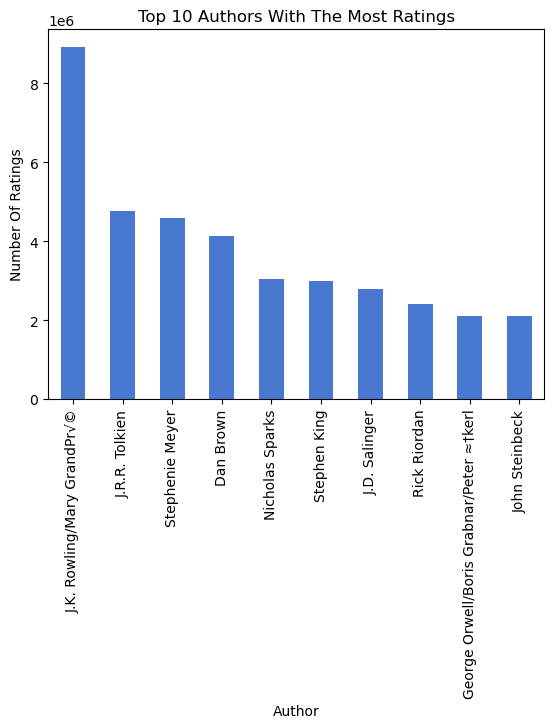

In [18]:
top_a_rc.plot(kind = "bar", title = "Top 10 Authors With The Most Ratings", xlabel = "Author", 
              ylabel = "Number Of Ratings", legend = False)

### Figure 1

In [19]:
a_tr = df[["authors", "text_reviews_count"]].groupby(by="authors")
a_tr

In [20]:
top_a_tr = a_tr.sum().sort_values("text_reviews_count", ascending = False).head(10)
top_a_tr

,text_reviews_count
authors,
J.K. Rowling/Mary GrandPr√©,128006
Stephenie Meyer,94265
Markus Zusak/Cao Xu√¢n Vi·ªát Kh∆∞∆°ng,86881
Jodi Picoult,79300
Lois Lowry,74197
Rick Riordan,69769
Diana Gabaldon,66428
Dan Brown,60875
Nicholas Sparks,60426


<Axes: title={'center': 'Top 10 Authors With The Most Text Reviews'}, xlabel='Author', ylabel='Number Of Text Reviews'>

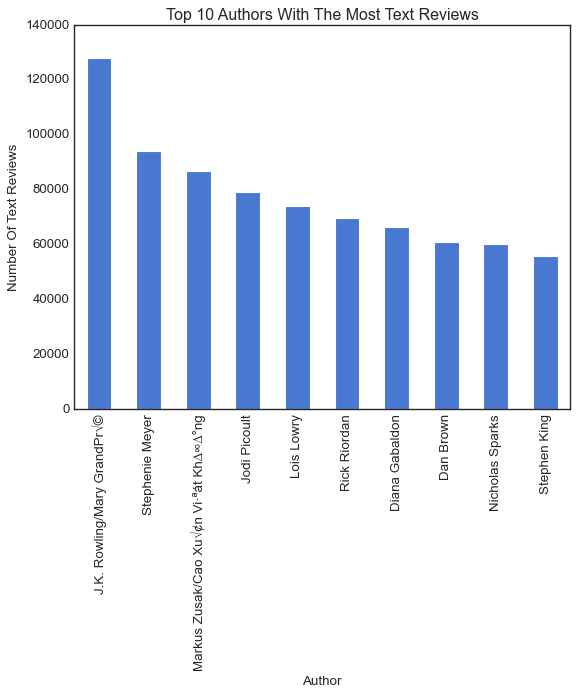

In [56]:
top_a_tr.plot(kind = "bar", title = "Top 10 Authors With The Most Text Reviews", xlabel = "Author", 
              ylabel = "Number Of Text Reviews", legend = False)

### Figure 2

# Find the titles  that have most reviews and text reviews

In [21]:
t_rc = df[["title", "ratings_count"]].groupby(by="title")
t_rc

In [23]:
top_t_rc = t_rc.sum().sort_values("ratings_count", ascending=False).head(10)
top_t_rc

,ratings_count
title,
Twilight (Twilight #1),4597666
The Hobbit or There and Back Again,2530894
The Catcher in the Rye,2457092
Angels & Demons (Robert Langdon #1),2425666
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),2342726
Harry Potter and the Chamber of Secrets (Harry Potter #2),2300296
Harry Potter and the Order of the Phoenix (Harry Potter #5),2153167
The Fellowship of the Ring (The Lord of the Rings #1),2130267
Animal Farm,2111750


<Axes: title={'center': 'Top 10 Titles With The Most Ratings'}, xlabel='Titles', ylabel='Number Of Ratings'>

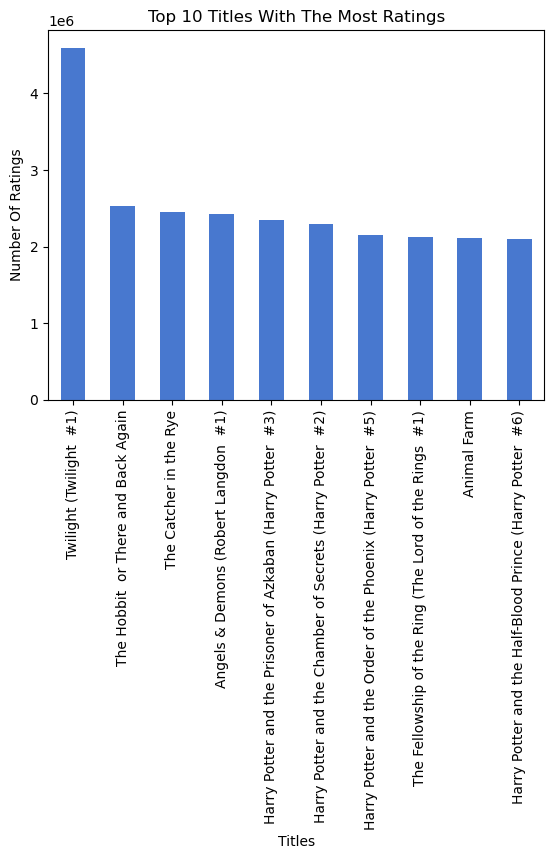

In [24]:
top_t_rc.plot(kind = "bar", title = "Top 10 Titles With The Most Ratings", xlabel = "Titles", 
              ylabel = "Number Of Ratings", legend = False)

### Figure 3 

In [25]:
t_tr = df[["title", "text_reviews_count"]].groupby(by="title")
t_tr

In [26]:
top_t_tr = t_tr.sum().sort_values("text_reviews_count", ascending=False).head(10)
top_t_tr

,text_reviews_count
title,
Twilight (Twilight #1),94265
The Book Thief,86881
The Giver (The Giver #1),56604
The Alchemist,55919
Water for Elephants,52759
The Lightning Thief (Percy Jackson and the Olympians #1),47985
Eat Pray Love,47620
The Glass Castle,46182
The Catcher in the Rye,43499


<Axes: title={'center': 'Top 10 Titles With The Most Text Reviews'}, xlabel='Titles', ylabel='Number Of Text Reviews'>

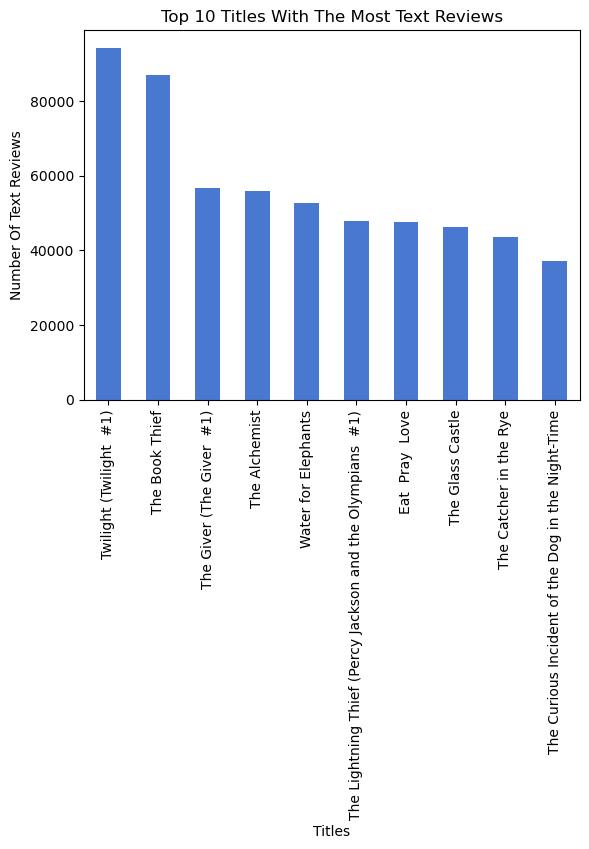

In [32]:
top_t_tr.plot(kind = "bar", title = "Top 10 Titles With The Most Text Reviews", xlabel = "Titles", 
              ylabel = "Number Of Text Reviews", legend = False)

### Figure 4

# Find The publishers that have most reviews and text reviews

In [28]:
p_rc = df[["publisher", "ratings_count"]].groupby(by="publisher")
p_rc

In [29]:
top_p_rc = p_rc.sum().sort_values("ratings_count", ascending = False).head(10)
top_p_rc

,ratings_count
publisher,
Penguin Books,10967448
Scholastic Inc.,6617877
Little Brown and Company,5493803
Penguin Classics,5281321
Vintage,5001557
Back Bay Books,4198407
Bantam,3949319
Pocket Books,3883190
Grand Central Publishing,3586469


<Axes: title={'center': 'Top 10 Publishers With The Most Ratings'}, xlabel='Publisher', ylabel='Number Of Ratings'>

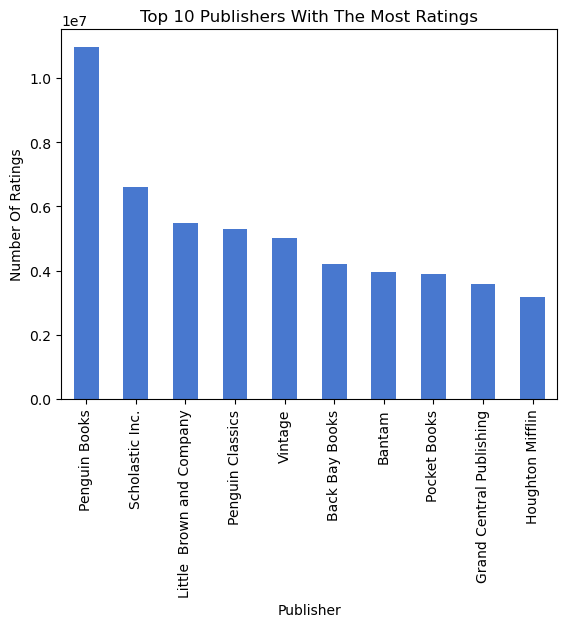

In [33]:
top_p_rc.plot(kind = "bar", title = "Top 10 Publishers With The Most Ratings", xlabel = "Publisher", 
              ylabel = "Number Of Ratings", legend = False)

### Figure 5

In [36]:
p_tr = df[["publisher", "text_reviews_count"]].groupby(by="publisher")
p_tr

In [37]:
top_p_tr = p_tr.sum().sort_values("text_reviews_count", ascending = False).head(10)
top_p_tr

,text_reviews_count
publisher,
Penguin Books,296756
Vintage,242670
Alfred A. Knopf,139108
Little Brown and Company,125560
Penguin Classics,107382
Harper Perennial,103038
HarperCollins,103031
Bantam,102505
Back Bay Books,99836


<Axes: title={'center': 'Top 10 Publishers With The Most Text Reviews'}, xlabel='Publisher', ylabel='Number Of Text Reviews'>

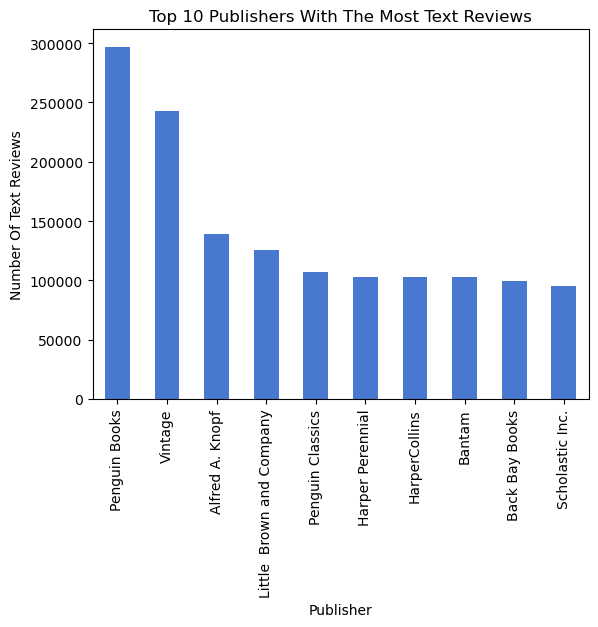

In [38]:
top_p_tr.plot(kind = "bar", title = "Top 10 Publishers With The Most Text Reviews", xlabel = "Publisher", 
              ylabel = "Number Of Text Reviews", legend = False)

### Figure 6

# Finding The Most Common Book Lengths

In [39]:
df["num_pages"].describe()

count    11123.000000
mean       336.405556
std        241.152626
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

In [41]:
df["num_pages"]

0         652
1         870
2         352
3         435
4        2690
         ... 
11118     512
11119     635
11120     415
11121     434
11122     272
Name: num_pages, Length: 11123, dtype: int64

In [42]:
bins = [0, 250, 600, 6576]
labels = ["short", "normal", "long"]
df["binned"] = pd.cut(df['num_pages'], bins=bins, labels=labels)
df[["binned", "ratings_count"]]

,binned,ratings_count
0,long,2095690
1,long,2153167
2,normal,6333
3,normal,2339585
4,long,41428
...,...,...
11118,normal,156
11119,long,783
11120,normal,820
11121,normal,769


In [43]:
b_rc = df[["binned", "ratings_count"]].groupby(by="binned")
b_rc

In [44]:
b_rc.sum().sort_values("ratings_count", ascending=False)

,ratings_count
binned,
normal,124385696
short,51065526
long,24098289


In [45]:
b_tr = df[["binned", "text_reviews_count"]].groupby(by="binned")
b_tr

In [46]:
book_lengths = b_tr.sum().sort_values("text_reviews_count", ascending = False)

<Axes: title={'center': 'Book Length Count'}, xlabel='Book Length', ylabel='Number Of Books'>

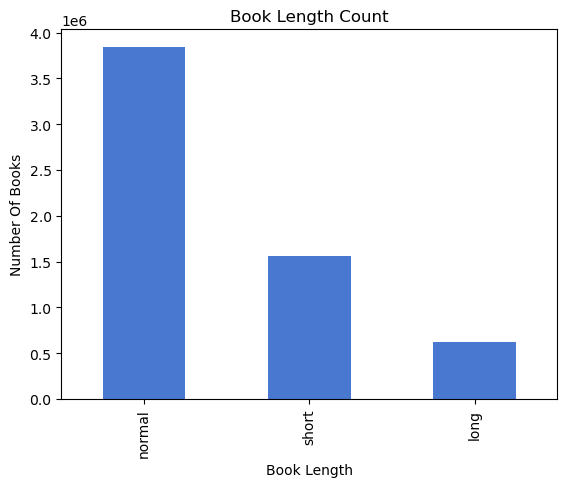

In [47]:
book_lengths.plot(kind = "bar", title = "Book Length Count", xlabel = "Book Length", 
              ylabel = "Number Of Books", legend = False)

### Figure 7 

# Now we need to find value counts for different languages

In [48]:
lang = df[["language_code"]].value_counts().head(10)
lang

language_code
eng              8908
en-US            1408
spa               218
en-GB             214
fre               144
ger                99
jpn                46
mul                19
zho                14
grc                11
dtype: int64

<Axes: title={'center': 'Book Language Counts'}, xlabel='Languages', ylabel='Number Of Books'>

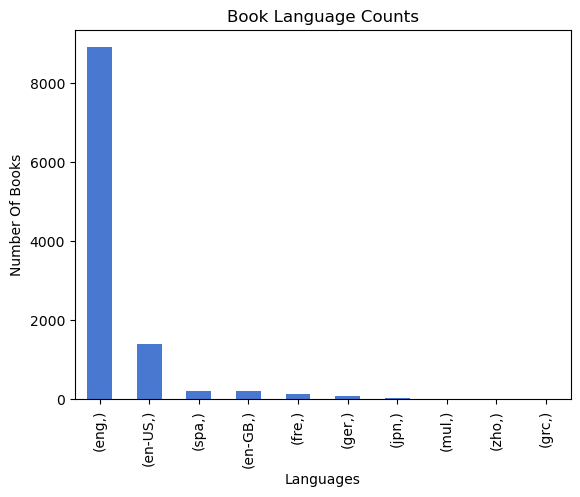

In [49]:
lang.plot(kind = "bar", title = "Book Language Counts", xlabel = "Languages", 
              ylabel = "Number Of Books", legend = False)

### Figure 8 

# Insights

- Figures 1 and 2 show us which authors have the most ratings. What stands out the most is that these authors are fiction writers of some form. The most common genres among these authors are fantasy, sci-fi, romance, and literary criticism. <br> <br>
- From Figure 3 and Figure 4, the top 10 titles with the most ratings and text reviews, respectively, all have the same thing in common: they are fiction titles, and most of these titles fall under the fantasy genre. <br><br>
- What the publishing companies in Figures 5 and 6 have in common is that the most common books that each of these books publish are fiction books. <br><br>
- From Figure 7, the most common book length is from 250-600 pages. Figure 8 shows that English books are by far the most popular kinds of books.


# Recommendations

 Based on the results of this analysis, If the primary goal of this company is to maximize profits, I advise that this company stay away from publishing non-fiction books and focus solely on fiction. In addition to this, the length of these books should be around 250-600 pages and in English. I recommend these genres be fantasy, and the specific fantasy type is unnecessary. It could be dark fantasy, romance fantasy, and science fantasy. In summary, the results of this analysis tell us that the book that will generate the most book sales and royalties will be some form of fantasy book in English with around 250-600 pages. 

# Link To Dataset

https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks